# 📈 Geopolitischer Schock & Aktienmärkte – Polygon.io Analyse
### Der Iran-Israel-Konflikt 2025 und seine Auswirkungen auf globale Märkte

Diese Analyse verwendet **Polygon.io** als Datenquelle, um den Einfluss zweier geopolitischer Ereignisse zu untersuchen:
- 🟥 13. Juni 2025 – Beginn des Iran-Israel-Krieges
- 🟪 22. Juni 2025 – Eintritt der USA in den Krieg

Wir analysieren Kursverläufe, Volatilität, Renditen und Korrelationen folgender Sektoren:
- 🇺🇸 Dow Jones 30 Aktien
- 🛢️ Energiesektor (Exxon, Chevron, Shell)
- 🛡️ Rüstungssektor (Lockheed Martin, Raytheon)


In [14]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import time

API_KEY = '8zRStkqFwCNqWnjINWGFQoN6k0amX9zg'

In [15]:
def get_polygon_data(ticker, start_date, end_date):
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date}/{end_date}"
    params = {
        'adjusted': 'true',
        'sort': 'asc',
        'limit': 5000,
        'apiKey': API_KEY
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        results = response.json().get('results', [])
        if results:
            df = pd.DataFrame(results)
            df['t'] = pd.to_datetime(df['t'], unit='ms')
            df.set_index('t', inplace=True)
            return df[['c']].rename(columns={'c': ticker})
    return pd.DataFrame()

In [16]:
tickers = ['AAPL', 'MSFT', 'JPM', 'CVX', 'JNJ', 'KO', 'XOM', 'SHEL', 'LMT', 'RTX']
start = '2025-03-01'
end = datetime.today().strftime('%Y-%m-%d')

In [17]:
price_data = pd.DataFrame()

for ticker in tickers:
    print(f"Downloading {ticker}...")
    df = get_polygon_data(ticker, start, end)
    if not df.empty:
        if price_data.empty:
            price_data = df
        else:
            price_data = price_data.join(df, how='outer')
    time.sleep(6)  # API hız sınırı

price_data = price_data.ffill().dropna(axis=1)
price_data.tail()

,AAPL,MSFT,JPM,CVX,JNJ,XOM,SHEL,LMT,RTX
t,,,,,,,,,
2025-06-16 04:00:00,198.42,479.14,270.36,146.03,155.22,112.48,71.43,467.06,146.46
2025-06-17 04:00:00,195.64,478.04,269.52,148.85,152.38,114.00,72.33,479.34,148.48
2025-06-18 04:00:00,196.58,480.24,273.96,148.19,150.73,113.19,72.00,468.60,145.87
2025-06-20 04:00:00,201.00,477.40,275.00,149.55,149.79,114.70,72.40,470.56,146.64
2025-06-23 04:00:00,201.50,486.00,278.27,146.86,151.32,111.74,70.84,472.46,145.81


In [18]:
returns = price_data.pct_change().dropna()
volatility = returns.rolling(10).std()

war_start = '2025-06-13'
us_entry = '2025-06-22'

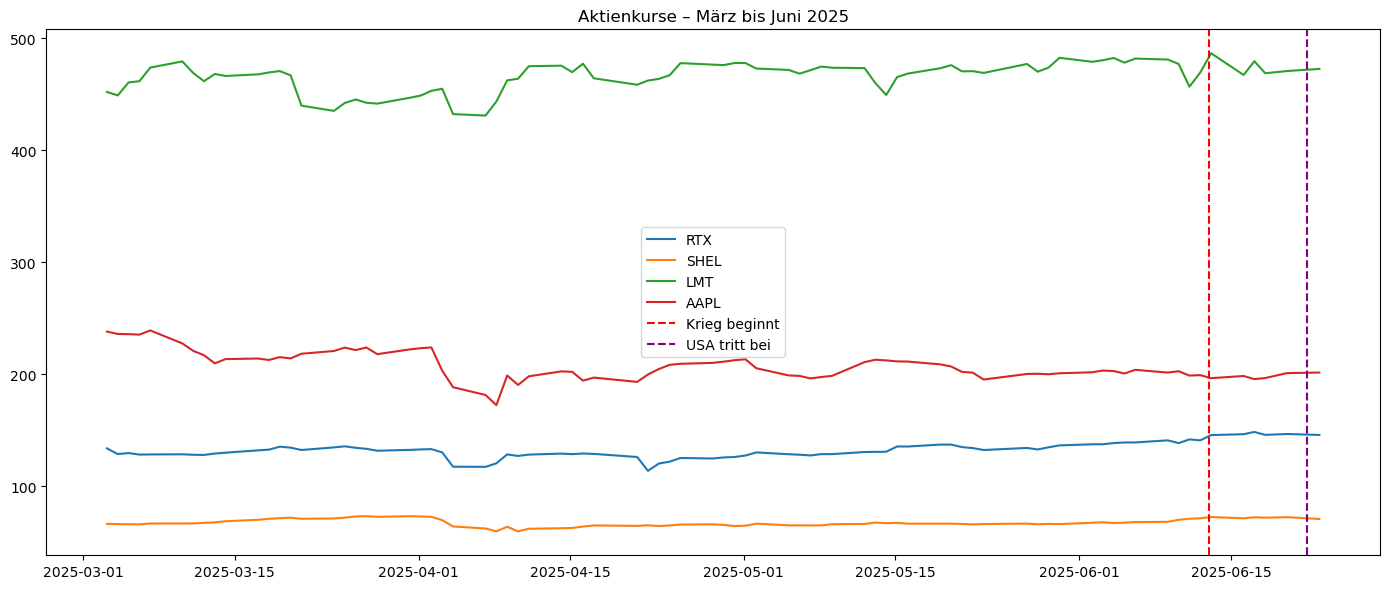

In [20]:
plt.figure(figsize=(14, 6))
for ticker in ['RTX', 'SHEL', 'LMT', 'AAPL']:
    if ticker in price_data.columns:
        plt.plot(price_data[ticker], label=ticker)
plt.axvline(pd.to_datetime(war_start), color='red', linestyle='--', label='Krieg beginnt')
plt.axvline(pd.to_datetime(us_entry), color='purple', linestyle='--', label='USA tritt bei')
plt.title('Aktienkurse – März bis Juni 2025')
plt.legend()
plt.tight_layout()
plt.show()

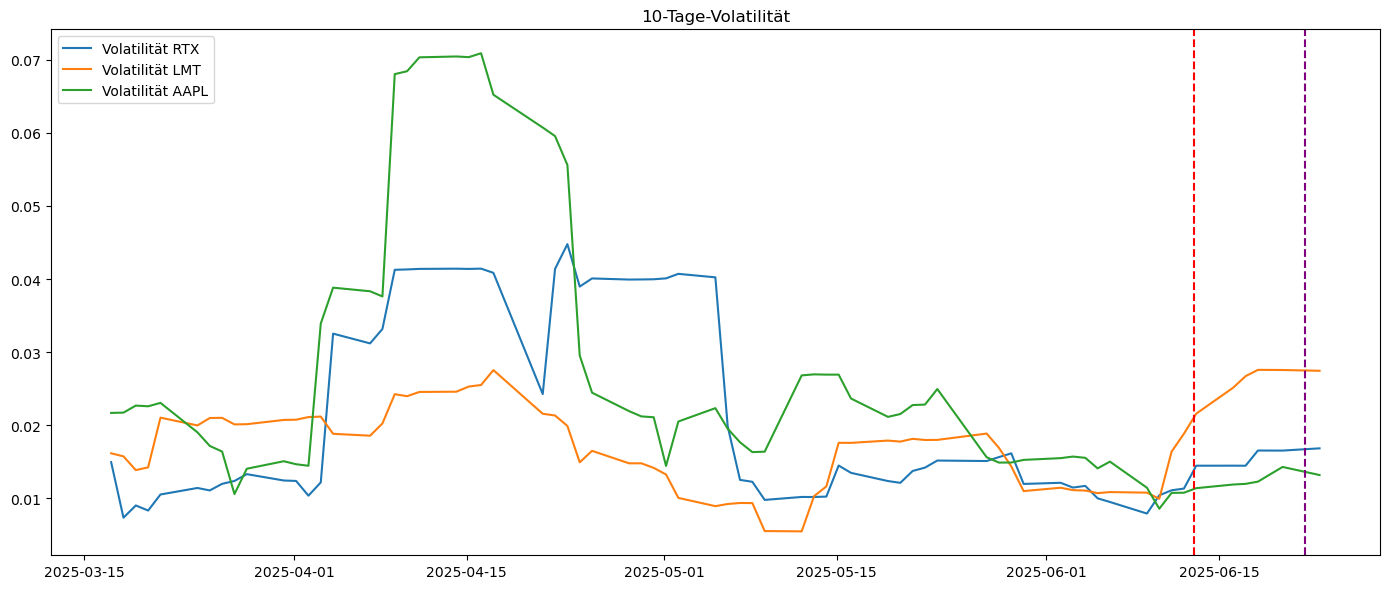

In [22]:
plt.figure(figsize=(14, 6))
for ticker in ['RTX', 'LMT', 'AAPL']:
    if ticker in volatility.columns:
        plt.plot(volatility[ticker], label=f'Volatilität {ticker}')
plt.axvline(pd.to_datetime(war_start), color='red', linestyle='--')
plt.axvline(pd.to_datetime(us_entry), color='purple', linestyle='--')
plt.title('10-Tage-Volatilität')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
before = returns.loc[:'2025-06-12'].mean()*100
after = returns.loc['2025-06-13':].mean()*100
impact_df = pd.DataFrame({'Vor dem Krieg (%)': before, 'Nach dem Krieg (%)': after})
impact_df.dropna().sort_values('Nach dem Krieg (%)', ascending=False)

,Vor dem Krieg (%),Nach dem Krieg (%)
JPM,0.064730,0.620128
RTX,0.100924,0.575446
XOM,0.044269,0.315563
MSFT,0.315881,0.250709
CVX,-0.053341,0.222896
AAPL,-0.204550,0.199815
LMT,0.068132,0.147610
SHEL,0.121904,-0.130974
JNJ,-0.081061,-0.571752


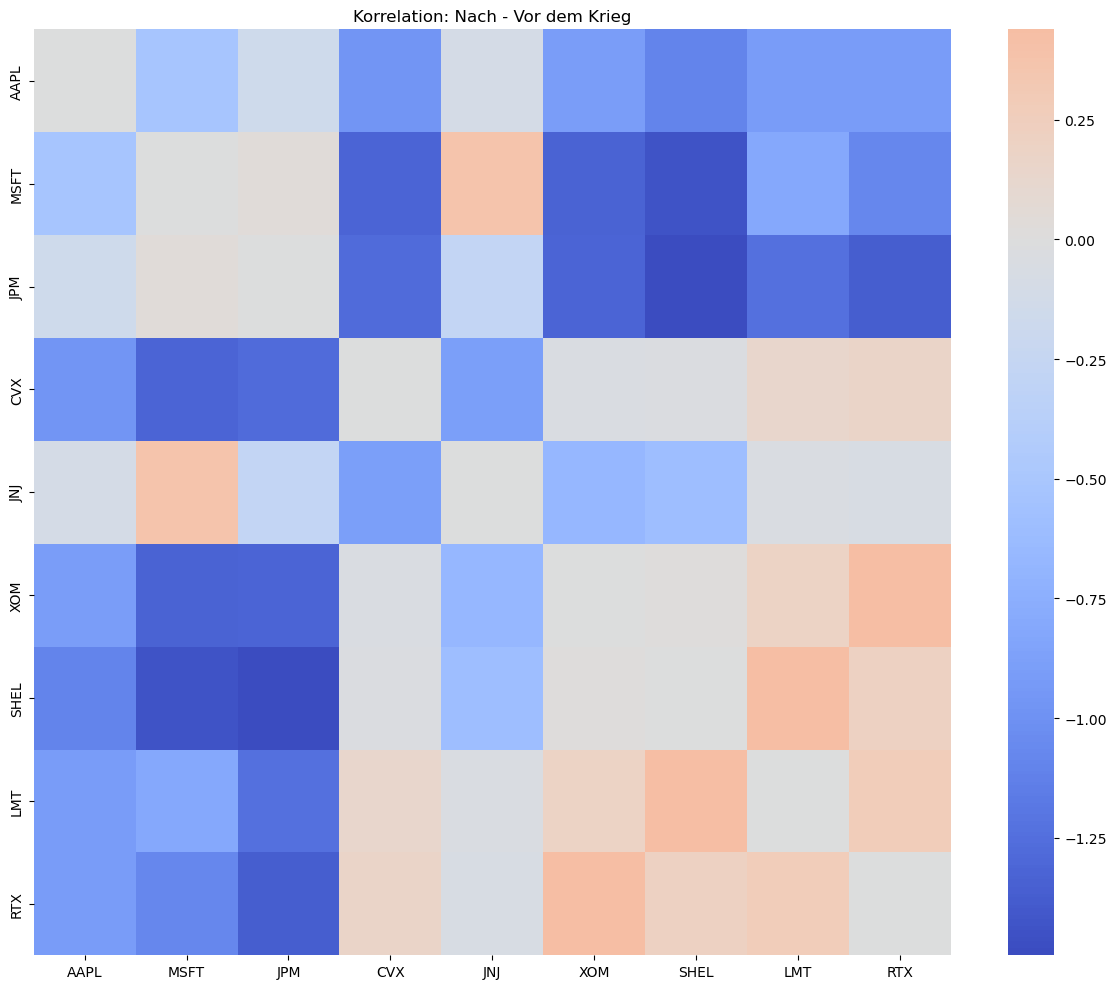

In [24]:
corr_before = returns.loc[:'2025-06-12'].corr()
corr_after = returns.loc['2025-06-13':].corr()
corr_diff = corr_after - corr_before

plt.figure(figsize=(12, 10))
sns.heatmap(corr_diff, cmap='coolwarm', center=0)
plt.title('Korrelation: Nach - Vor dem Krieg')
plt.tight_layout()
plt.show()